# Assignment_3 SVM

In [139]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from google.colab import files
import io

# Part 2: SVM

### Use the following function to plot the classification regions

In [140]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [141]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle =True)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

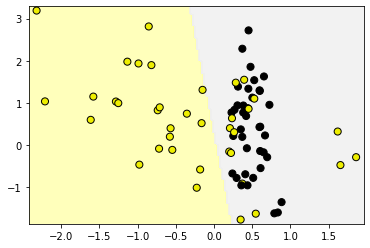

In [143]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

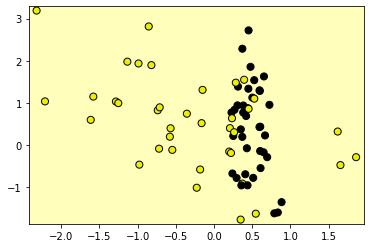

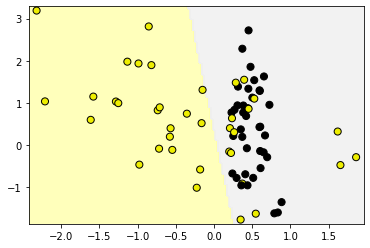

In [144]:
## at c=0.00001

clf = SVC(kernel='linear',C=0.00001)
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)


## at c=100

clf = SVC(kernel='linear',C=100)
clf.fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)


##higher c >> increase in varience and decrease in bias which lead to overfitting of data
##lower c  >> decrase in varience and increase in bias which lead to underfitting of data

### Use the fruits dataset in questions 4, 5, 6.

In [145]:
files.upload()

Saving fruit_data_with_colors.txt to fruit_data_with_colors (6).txt


{'fruit_data_with_colors.txt': b'fruit_label\tfruit_name\tfruit_subtype\tmass\twidth\theight\tcolor_score\r\n1\tapple\tgranny_smith\t192\t8.4\t7.3\t0.55\r\n1\tapple\tgranny_smith\t180\t8.0\t6.8\t0.59\r\n1\tapple\tgranny_smith\t176\t7.4\t7.2\t0.60\r\n2\tmandarin\tmandarin\t86 \t6.2\t4.7\t0.80\r\n2\tmandarin\tmandarin\t84 \t6.0\t4.6\t0.79\r\n2\tmandarin\tmandarin\t80 \t5.8\t4.3\t0.77\r\n2\tmandarin\tmandarin\t80 \t5.9 \t4.3\t0.81\r\n2\tmandarin\tmandarin\t76\t5.8\t4.0\t0.81\r\n1\tapple\tbraeburn\t178\t7.1\t7.8\t0.92\r\n1\tapple\tbraeburn\t172\t7.4\t7.0\t0.89\r\n1\tapple\tbraeburn\t166\t6.9\t7.3\t0.93\r\n1\tapple\tbraeburn\t172\t7.1\t7.6\t0.92\r\n1\tapple\tbraeburn\t154\t7.0\t7.1\t0.88\r\n1\tapple\tgolden_delicious\t164\t7.3\t7.7\t0.70\r\n1\tapple\tgolden_delicious\t152\t7.6\t7.3\t0.69\r\n1\tapple\tgolden_delicious\t156\t7.7\t7.1\t0.69\r\n1\tapple\tgolden_delicious\t156\t7.6\t7.5\t0.67\r\n1\tapple\tgolden_delicious\t168\t7.5\t7.6\t0.73\r\n1\tapple\tcripps_pink\t162\t7.5\t7.1\t0.83\r\n1\ta

In [146]:
import pandas as pd

fruits = pd.read_table('fruit_data_with_colors.txt')
print(fruits.head())
feature_names_fruits = ['height', 'width']

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [147]:
from sklearn.svm import LinearSVC
X = fruits[feature_names_fruits]
y = fruits['fruit_label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 ,test_size=0.25)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_train,y_train)
# X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.75

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

1.4 models due to 4 labels in the dataset

In [148]:
from sklearn.multiclass import OneVsRestClassifier

X_train=np.array(X_train)
y_train=np.array(y_train)
clf = OneVsRestClassifier(LinearSVC()).fit(X_train,y_train)

clf.score(X_train,y_train)
print("coefficients",clf.coef_)
print("intercepts",clf.intercept_)


coefficients [[-0.26872327  0.52747052]
 [-1.10776031  0.78991692]
 [-0.01879877  0.20178038]
 [ 1.0105044  -1.26189155]]
intercepts [[-1.90404412]
 [ 0.78679348]
 [-1.71710506]
 [ 0.37271225]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn

#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

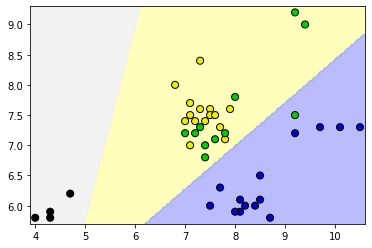

In [149]:
plot_class_regions_for_classifier(clf, X_train, y_train, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True)


from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [150]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [151]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0 ,test_size=0.25)
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print('params : ' , clf.best_params_)
clf.score(X_train,y_train)

params :  {'C': 10, 'kernel': 'rbf'}


0.9154929577464789

#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [152]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0 ,test_size=0.25)

clf = SVC(kernel='rbf',C=10)
clf.fit(X_train, y_train)

print('Accuracy of training set', clf.score(X_train, y_train))   
print('Accuracy of test set' ,clf.score(X_test, y_test)) 


Accuracy of training set 0.9154929577464789
Accuracy of test set 0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [166]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#=======================================================================
PipelineModel = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=0, C=10))
PipelineModel.fit(X_train, y_train)

#Calculating Details

print('Pipeline Model Train Score is : ' , PipelineModel.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , PipelineModel.score(X_test, y_test))


Pipeline Model Train Score is :  0.9882629107981221
Pipeline Model Test Score is :  0.965034965034965
